<a href="https://colab.research.google.com/github/arssite/MachineLearning/blob/main/Bias%26Variance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Bias & Variance**

The concepts of bias and variance are essential in understanding the behavior and performance of machine learning models, particularly in the context of supervised learning. Here's a brief explanation of bias and variance, and their relationship:

1. **Bias**:
   - Bias refers to the error introduced by approximating a real-world problem with a simplified model.
   - A high bias model tends to oversimplify the underlying patterns in the data, leading to underfitting.
   - Underfitting occurs when the model is unable to capture the complexity of the data and performs poorly on both the training and test sets.
   - Examples of high bias models include linear models for highly non-linear data or shallow decision trees for complex decision boundaries.

2. **Variance**:
   - Variance refers to the variability of model predictions for different instances of the training data.
   - A high variance model is overly sensitive to the noise or random fluctuations in the training data, leading to overfitting.
   - Overfitting occurs when the model captures the noise or random fluctuations in the training data rather than the underlying patterns, resulting in poor generalization to unseen data.
   - Examples of high variance models include deep neural networks with many parameters that can memorize the training data.

3. **Bias-Variance Tradeoff**:
   - The bias-variance tradeoff represents the balance between bias and variance in machine learning models.
   - Increasing model complexity reduces bias but increases variance, and vice versa.
   - The goal is to find the optimal balance between bias and variance to achieve good generalization performance on unseen data.
   - Techniques such as regularization, cross-validation, and ensemble learning can help manage the bias-variance tradeoff by controlling model complexity and reducing overfitting.

In summary, bias and variance are two sources of error in machine learning models that need to be carefully managed to achieve good generalization performance. Understanding the bias-variance tradeoff is crucial for selecting appropriate models, tuning hyperparameters, and improving model performance.

# **Example**

We generate synthetic training data with added noise using a sine function and then generate synthetic test data without noise.

We fit polynomial regression models of different degrees (1, 3, and 9) to the training data.

For each model, we make predictions on the test data and calculate the mean squared error (MSE) between the true function and the model's predictions.

We plot the true function, the training data, and the model's predictions for each degree of the polynomial regression model.

________________________________________

The resulting plot illustrates the concepts of bias and variance:

- The model with a low degree (degree 1) has high bias and low variance. It oversimplifies the true function and fails to capture its complexity.

- The model with a moderate degree (degree 3) achieves a good balance between bias and variance. It closely approximates the true function and generalizes well to unseen data.

- The model with a high degree (degree 9) has low bias and high variance. It fits the training data closely but fails to generalize to unseen data, resulting in overfitting.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [3]:
# Function to generate synthetic data with added noise
def generate_data(n_samples, noise):
    X = np.linspace(0, 5, n_samples)
    y = np.sin(X) + noise * np.random.randn(n_samples)
    return X.reshape(-1, 1), y

In [4]:
# Generate synthetic training data with noise
np.random.seed(0)
X_train, y_train = generate_data(n_samples=20, noise=0.1)

In [5]:
# Generate synthetic test data without noise
X_test, y_test = generate_data(n_samples=100, noise=0)

In [6]:
# Fit polynomial regression models of different degrees
degrees = [1, 3, 9]
plt.figure(figsize=(12, 6))

for i, degree in enumerate(degrees):
    # Define the polynomial regression pipeline
    model = Pipeline([
        ('poly', PolynomialFeatures(degree=degree)),
        ('linear', LinearRegression())
    ])

<Figure size 1200x600 with 0 Axes>

In [7]:
  # Fit the model to the training data
    model.fit(X_train, y_train)

Pipeline(steps=[('poly', PolynomialFeatures(degree=9)),
                ('linear', LinearRegression())])

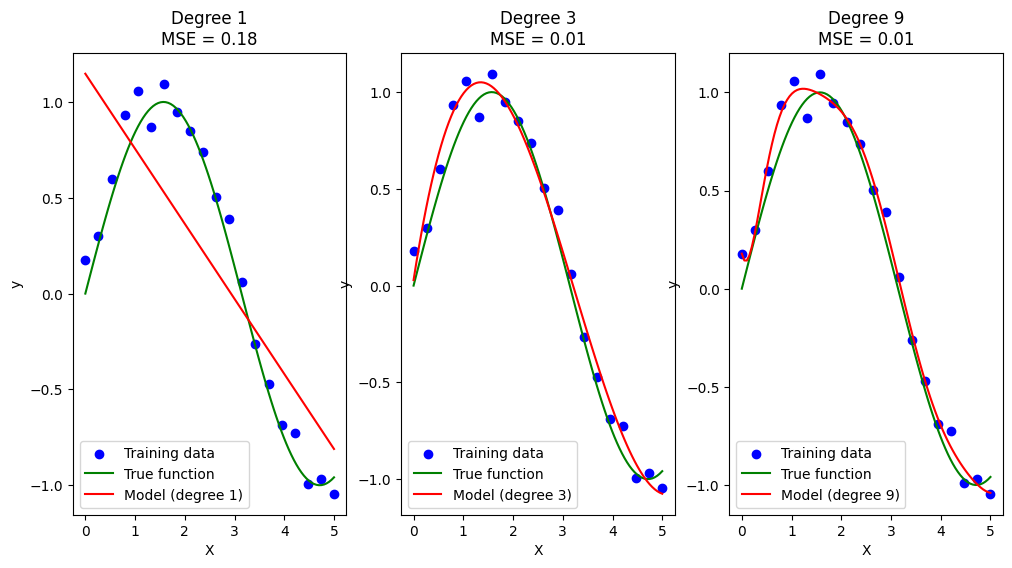

In [10]:
# Fit polynomial regression models of different degrees
degrees = [1, 3, 9]
plt.figure(figsize=(12, 6))

for i, degree in enumerate(degrees):
    # Define the polynomial regression pipeline
    model = Pipeline([
        ('poly', PolynomialFeatures(degree=degree)),
        ('linear', LinearRegression())
    ])

    # Fit the model to the training data
    model.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = model.predict(X_test)

    # Calculate mean squared error (MSE)
    mse = mean_squared_error(y_test, y_pred)

    # Plot the true function
    plt.subplot(1, len(degrees), i + 1)
    plt.scatter(X_train, y_train, color='blue', label='Training data')
    plt.plot(X_test, y_test, color='green', label='True function')

    # Plot the model's predictions
    plt.plot(X_test, y_pred, color='red', label='Model (degree %d)' % degree)
    plt.title('Degree %d\nMSE = %.2f' % (degree, mse))
    plt.xlabel('X')
    plt.ylabel('y')
    plt.legend()


# Observations:

By examining the plots, we can observe the trade-off between bias and variance:
The model with a low degree (degree 1) has high bias and low variance, resulting in underfitting.
The model with a moderate degree (degree 3) achieves a good balance between bias and variance, providing a reasonable fit to the data.
The model with a high degree (degree 9) has low bias and high variance, resulting in overfitting as it closely follows the training data but performs poorly on the test data.